In [2]:
import os
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

In [1]:
# helper functions

def series_append(series, list, keys):
    for i in range(64):
        series[keys[i]].append(float(list[i]))
    return series

def load_series(filename):
    with open(filename, 'r') as csv_in:
        csv_file = list(csv.reader(csv_in))
        series = {}
        keys = csv_file[0]
        for key in keys: series[key] = []
        for i in range(2, len(csv_file), 2):
            series = series_append(series, csv_file[i], keys)
        return [series, int((len(csv_file) - 2) / 2)]


def unroll(series):
    l = []
    for key in series:
        if (key[-1] == 'v' or key[-1] == 'z'): continue
        l += series[key]
    return l

In [66]:
dir = '..\\time_series\\Time_normalized_stages\\4_final\\'

files = os.listdir(dir)

unrolled_series = []
labels = []


for file in files:
    series, num_frames = load_series(dir + file)
    unrolled_series.append(unroll(series))
    labels.append(int(file[16]))

print(len(unrolled_series))
print(len(unrolled_series[0]))

464
224


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 464 samples in 0.001s...
[t-SNE] Computed neighbors for 464 samples in 0.083s...
[t-SNE] Computed conditional probabilities for sample 464 / 464
[t-SNE] Mean sigma: 1.416250
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.178413
[t-SNE] KL divergence after 1000 iterations: 0.477803


Text(0.5, 1.0, 'Low Arms')

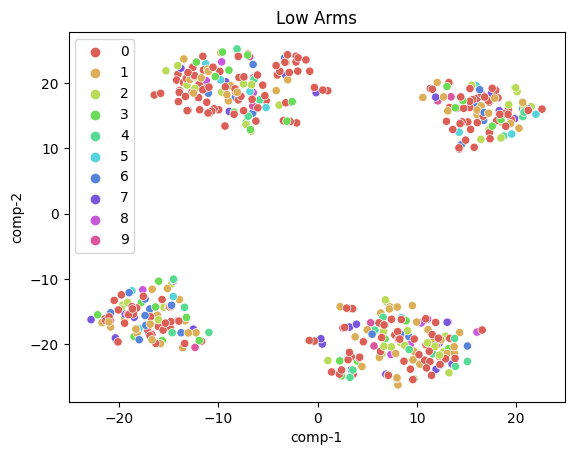

In [68]:
unrolled_series = [x for _,x in sorted(zip(labels,unrolled_series))]

X = np.asarray(unrolled_series)



Y = np.asarray(labels)

tsne = TSNE(n_components=2, verbose=1, random_state=11)

z = tsne.fit_transform(X) 

df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set_title('Low Arms')